# Imports

In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from insightface.app import FaceAnalysis

# Configure Model

In [2]:
# buffalo_l model

model_l = FaceAnalysis(name='buffalo_l',
                        root='/Users/boss/Desktop/Notes/4_attendance_app/insightface_model/models/buffalo_l', 
                        providers=['CUDAExecutionProvider'])

model_l.prepare(ctx_id=0, det_size=(640, 640), det_thresh=0.5) # input size

/Users/boss/miniconda3/envs/tensorflow/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/boss/Desktop/Notes/4_attendance_app/insightface_model/models/buffalo_l/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/boss/Desktop/Notes/4_attendance_app/insightface_model/models/buffalo_l/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/boss/Desktop/Notes/4_attendance_app/insightface_model/models/buffalo_l/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/boss/Desktop/Notes/4_attendance_app/insightface_model/models/buffalo_l/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.

# Data Preparation

## Extract Facial Fetaures and Labels

In [3]:
images_dir = '/Users/boss/Desktop/Notes/2_Fast_Face_Recognition_System/images'
list_dir = os.listdir(path=images_dir)
print(list_dir)

['teacher-Barack_Obama', '.DS_Store', 'student-Angelina_Jolie', 'student-Chris_Evans', 'teacher-Morgan_Freeman', 'student-Scarlett_Johansson']


In [6]:
import re

def remove_special_characters(input_string):
    # Define a regular expression pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'  # This pattern matches anything that is not a letter, digit, or whitespace

    # Use re.sub() to replace matched special characters with an empty string
    result_string = re.sub(pattern, ' ', input_string)

    return result_string.title()

In [8]:
# # extracting names from listed directories
# role_and_name = {remove_special_characters(name.split('-')[1]): remove_special_characters(name.split('-')[0]) for name in list_dir if '-' in name}
# # print(role_and_name)

person_info = []
for folder in list_dir:
    if folder != '.DS_Store':
        role, name = folder.split('-')
        name = remove_special_characters(name)
        role = remove_special_characters(role)
        img_files = os.listdir(path=f'{images_dir}/{folder}')
        # print(img_files)
        for file in img_files:
            path = f'{images_dir}/{folder}/{file}'
            # print(path)

            # read image
            img = cv2.imread(path)

            # get info
            result = model_l.get(img, max_num=1)
            
            if len(result) > 0:
                # get embeddings
                res = result[0]
                embeddings = res['embedding']

                # appending to list
                person_info.append([name, role, embeddings])
            
            
print(person_info)

        

/Users/boss/miniconda3/envs/tensorflow/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


[['Barack Obama', 'Teacher', array([ 1.01677813e-01,  8.72059345e-01,  8.20790976e-02,  8.66239786e-01,
       -6.83377326e-01, -5.86362481e-01, -5.17531157e-01,  3.50272149e-01,
       -8.00685823e-01,  1.59926295e+00,  3.13717335e-01, -1.24295270e+00,
       -3.54073972e-01, -9.94484484e-01, -1.40921688e+00,  5.42272806e-01,
       -2.14447320e-01, -5.45962214e-01, -3.98445219e-01, -1.88824296e-01,
        8.36232722e-01, -3.89840752e-02,  6.32570684e-02,  1.92688197e-01,
        9.23383653e-01, -3.12970102e-01,  4.67518687e-01,  5.51410079e-01,
       -6.14781797e-01,  4.30935442e-01, -9.02108192e-01,  2.16013223e-01,
       -1.18549049e+00, -2.14485690e-01,  1.35073602e-01, -8.47282946e-01,
       -9.25076753e-02,  6.97160959e-02, -1.48303461e+00,  7.33820200e-01,
       -2.19972587e+00,  1.17768252e+00,  3.40460092e-02,  3.37222308e-01,
        1.71789765e+00,  4.29728687e-01,  1.33849812e+00, -1.78957254e-01,
       -5.22468448e-01,  1.13050306e+00,  4.80523519e-02, -3.94423544e-

In [9]:
# conversion to dataframe
df = pd.DataFrame(person_info, columns=['Name', 'Role', 'Facial_Features'])
df.sample(5) # store in Redis

,Name,Role,Facial_Features
3,Barack Obama,Teacher,"[0.27879506, 2.276473, -0.5138694, 0.4970268, ..."
26,Chris Evans,Student,"[0.5345342, -0.3031451, -0.5453049, 0.20747548..."
40,Scarlett Johansson,Student,"[-0.16530891, -0.3378687, -0.25737864, -0.9243..."
24,Chris Evans,Student,"[0.53905046, -0.40228534, 0.26803845, -1.25638..."
16,Angelina Jolie,Student,"[0.9446527, 1.6263312, -0.25198096, -1.4123675..."


## Inference Testing

In [10]:
img_test = cv2.imread('/Users/boss/Desktop/Notes/2_Fast_Face_Recognition_System/test_images/test_2.jpeg')

# feature extraction 

test_results = model_l.get(img_test, max_num=0)

for res in test_results:
    bbox = res['bbox']
    score = res['det_score']
    test_embedding = res['embedding']

/Users/boss/miniconda3/envs/tensorflow/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [20]:
len(test_embedding)
print(type(test_embedding))
test_embedding.shape

<class 'numpy.ndarray'>


(512,)

In [15]:
# converting all facial features to array
X_list = df['Facial_Features'].tolist()
X = np.asarray(X_list)
X.shape

(50, 512)

### Distance and Similarity Calculation

In [22]:
from sklearn.metrics import pairwise
y = test_embedding.reshape(1, -1) # 1 x 512 from 512, (like adding dims) for test image
print(y.shape)

# euclidean distances
euclidean_distance = pairwise.euclidean_distances(X, y)

# manhattan distance
manhattan_distance = pairwise.manhattan_distances(X, y)

# cosine similarity
cosine_similarity = pairwise.cosine_similarity(X, y)

(1, 512)


In [68]:
data_search = df.copy()

# in comparison to test image
data_search['euclidean_distance'] = euclidean_distance
data_search['manhattan_distance'] = manhattan_distance
data_search['cosine_similarity'] = cosine_similarity

### Plot and Visualize Distances

In [69]:
data_search.head()

,Name,Role,Facial_Features,euclidean_distance,manhattan_distance,cosine_similarity
0,Barack Obama,Teacher,"[0.10167781, 0.87205935, 0.0820791, 0.8662398,...",29.933586,525.386079,-0.043119
1,Barack Obama,Teacher,"[0.24268264, 0.75843126, -0.6242971, -0.568510...",31.625025,563.185011,-0.059071
2,Barack Obama,Teacher,"[-0.4399761, 1.5168779, -1.044512, -0.5533731,...",29.419538,521.697729,-0.006288
3,Barack Obama,Teacher,"[0.27879506, 2.276473, -0.5138694, 0.4970268, ...",29.427261,515.463050,0.000923
4,Barack Obama,Teacher,"[-0.417621, 1.2299838, -0.42835748, -0.1310508...",29.771151,525.217119,-0.011098


In [70]:
import matplotlib.pyplot as plt

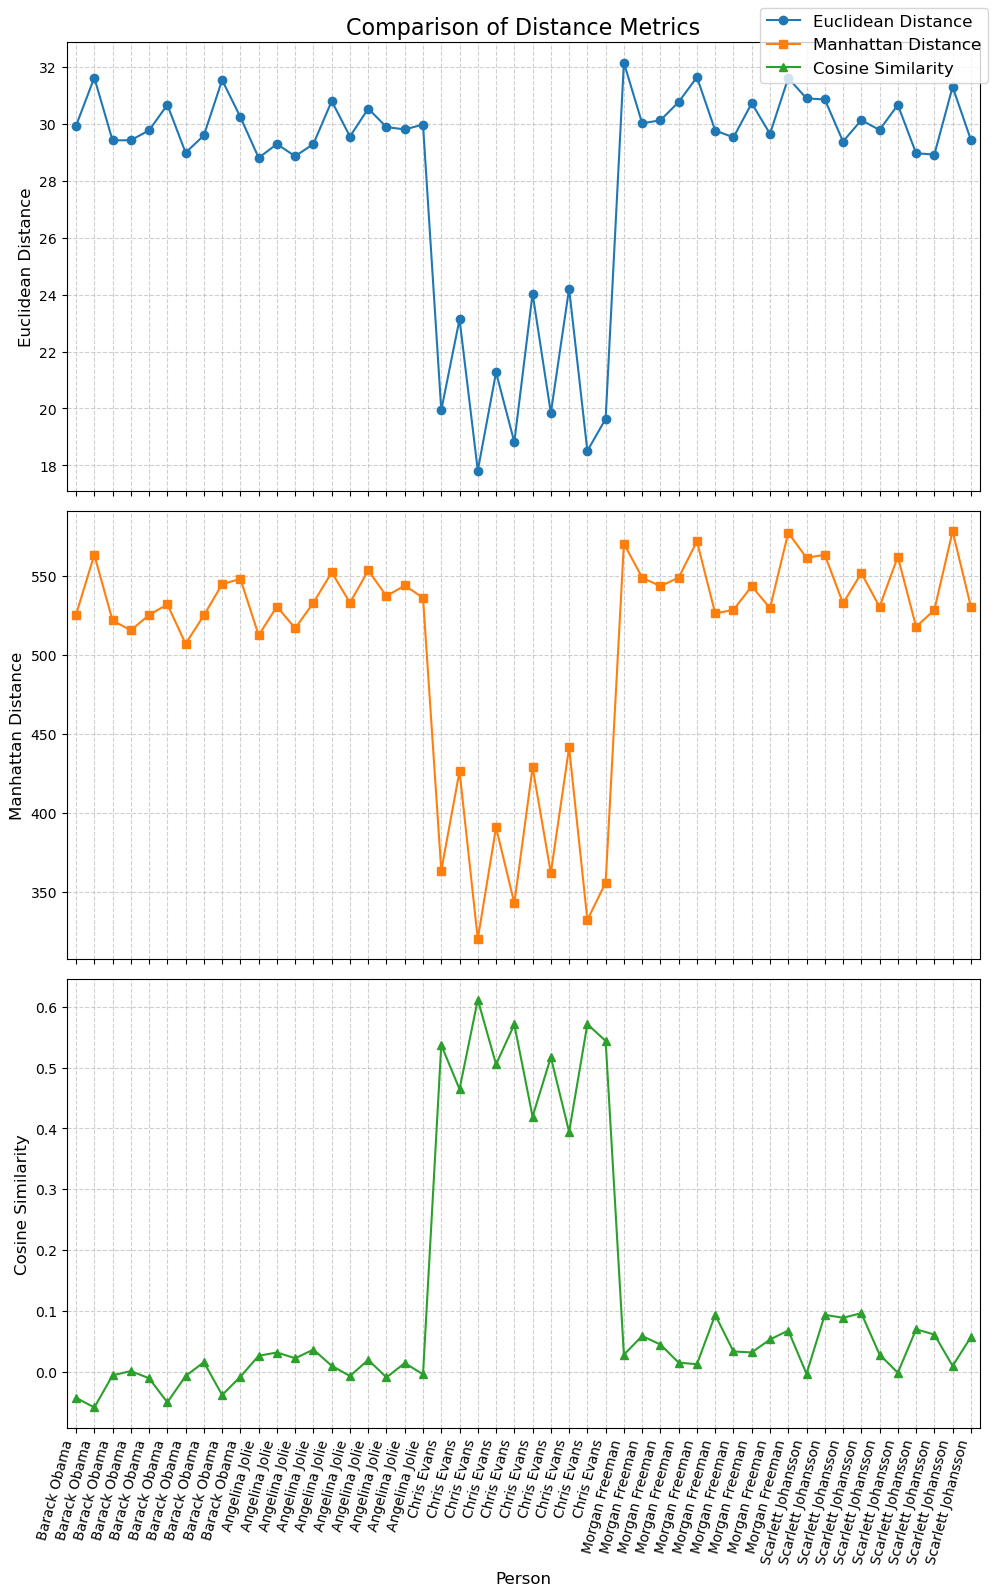

In [71]:
# Create subplots with a shared x-axis
fig, axs = plt.subplots(3, 1, figsize=(10, 16), sharex=True)

# Customize color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot Euclidean Distance
axs[0].plot(data_search['euclidean_distance'], color=colors[0], marker='o', linestyle='-')
axs[0].set_ylabel('Euclidean Distance', fontsize=12)
axs[0].set_title('Comparison of Distance Metrics', fontsize=16)
axs[0].grid(True, linestyle='--', alpha=0.6)
axs[0].set_xlim([-0.5, len(data_search['euclidean_distance']) - 0.5])

# Plot Manhattan Distance
axs[1].plot(data_search['manhattan_distance'], color=colors[1], marker='s', linestyle='-')
axs[1].set_ylabel('Manhattan Distance', fontsize=12)
axs[1].grid(True, linestyle='--', alpha=0.6)

# Plot Cosine Similarity
axs[2].plot(data_search['cosine_similarity'], color=colors[2], marker='^', linestyle='-')
axs[2].set_xlabel('Person', fontsize=12)
axs[2].set_ylabel('Cosine Similarity', fontsize=12)
axs[2].grid(True, linestyle='--', alpha=0.6)

# Customize tick labels and legend
xticks = np.arange(len(data_search['Name']))
xticklabels = data_search['Name']
for ax in axs:
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, rotation=75, ha="right")
    ax.tick_params(axis='both', which='major', labelsize=10)

# Add a legend
labels = ['Euclidean Distance', 'Manhattan Distance', 'Cosine Similarity']
fig.legend(labels, loc='upper right', fontsize=12)

# Add some spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

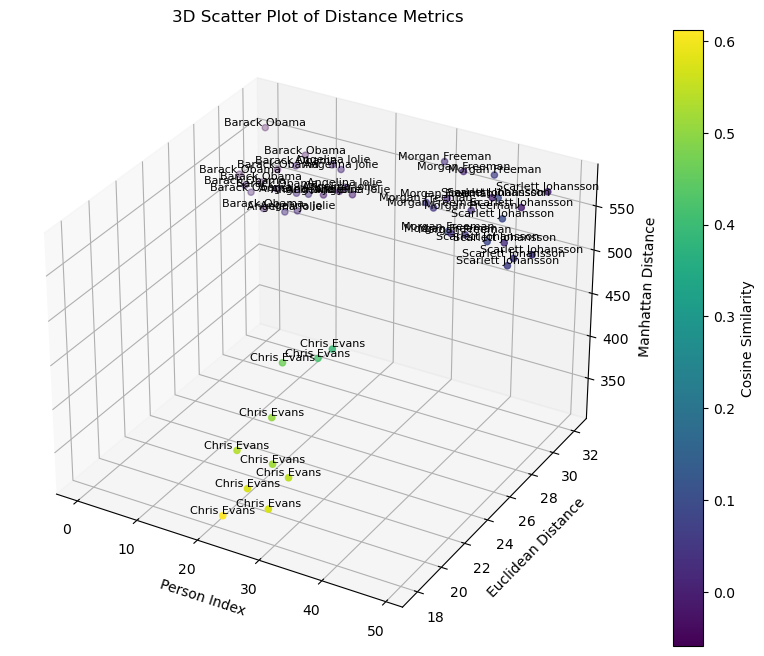

In [72]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define data
x = range(len(data_search['Name']))
y = data_search['euclidean_distance']
z = data_search['manhattan_distance']
c = data_search['cosine_similarity']
names = data_search['Name']

# Scatter plot for Euclidean distance
scatter = ax.scatter(x, y, z, c=c, cmap='viridis', label='Euclidean Distance')

# Customize labels and title
ax.set_xlabel('Person Index')
ax.set_ylabel('Euclidean Distance')
ax.set_zlabel('Manhattan Distance')
ax.set_title('3D Scatter Plot of Distance Metrics')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# Annotate points with names
for i, name in enumerate(names):
    ax.text(x[i], y[i], z[i], name, fontsize=8, ha='center', va='bottom')

# Show the plot
plt.show()


### Euclidean Distance

**Vector Comparison:** Once the images are represented as sets of vectors, you can calculate the Euclidean distance between corresponding pixels in the two images. 

    Euclidean Distance = √((A₁ - B₁)² + (A₂ - B₂)² + ... + (Aₙ - Bₙ)²)
- Here, A₁, A₂, ..., Aₙ represent the vector components (e.g., pixel values) of the first image.
- B₁, B₂, ..., Bₙ represent the corresponding vector components of the second image.


**Image Comparison:** After calculating the Euclidean distance for each pair of corresponding pixels, you can use these distances to determine the overall similarity or dissimilarity between the two images. Smaller Euclidean distances indicate greater similarity, while larger distances indicate greater dissimilarity.

In [55]:
# Now setting a threshold to clearn noise and predict the person

d_eq_optimal = 25 # threshold for optimal point for euclidean distance

In [61]:
# filter out less than optimal
data_filter = data_search.query(f'euclidean_distance < {d_eq_optimal}')
data_filter.reset_index(drop=True, inplace=True)

if len(data_filter) > 0:
    argmin = data_filter['euclidean_distance'].argmin()
    name, role = data_filter.loc[argmin][['Name', 'Role']] # locating the person first by finding lowest argmin then saving the data of person


else:
    name = 'Unknown'
    role = 'Unknown'


In [62]:
print(name, role) # this was for euclidean distance

Chris Evans Student


### Manhattan Distance

**Manhattan distance** is another way to measure the distance between two points or vectors, similar to Euclidean distance. However, it calculates the distance by summing the absolute differences between the corresponding components of the vectors, as if you were navigating a city grid like a taxi driver on a grid-like street layout.

Here's a breakdown as to how Manhattan distance works with vectors:

**Vectors and Components:** Just like with Euclidean distance, you start with two vectors, let's call them vector A and vector B. Each vector has components, which could represent various attributes or quantities.
Calculating Manhattan Distance: To find the Manhattan distance between these two vectors, you sum up the absolute differences between their corresponding components.

The formula for Manhattan distance is:<br>

        Manhattan Distance = |A₁ - B₁| + |A₂ - B₂| + ... + |Aₙ - Bₙ|
        - A₁, A₂, ..., Aₙ are the components of vector A.
        - B₁, B₂, ..., Bₙ are the components of vector B.
        - |x| denotes the absolute value of x.

**Interpretation:** Think of it like navigating a city grid. When you travel from one point to another in a city with streets that run north-south and east-west (like Manhattan in New York), you can't take a direct diagonal path like in Euclidean distance. Instead, you have to move along the grid lines, which results in a distance measured along the streets.

In [73]:
d_mn_optimal = 450 # threshold for manhattan distance

In [74]:
# for manhattan distance
data_filter_manhattan = data_search.query(f'manhattan_distance < {d_mn_optimal}') 
data_filter_manhattan.reset_index(drop=True, inplace=True)

if len(data_filter_manhattan) > 0:
    argmin = data_filter_manhattan['manhattan_distance'].argmin()
    name, role = data_filter_manhattan.loc[argmin][['Name', 'Role']]

else:
    name = 'Unknown'
    role = 'Unknown'

In [75]:
print(name, role)

Chris Evans Student


### Cosine Similarity

**Cosine similarity** is a mathematical measure used to determine how similar two non-zero vectors are, particularly in the context of high-dimensional spaces like text documents or feature vectors in machine learning. It measures the cosine of the angle between these vectors, which indicates their similarity.

Here's how cosine similarity works:

**Vector Representation:** Imagine you have two vectors, let's call them vector A and vector B. These vectors could represent various things, such as document features, user preferences, or any set of numerical values.
**Calculating Cosine Similarity:** To calculate the cosine similarity between these two vectors, you follow these steps:
- a. Compute the dot product of the two vectors A and B. The dot product is calculated by multiplying the corresponding components of the vectors and then summing them up:
*Dot Product* = A₁ * B₁ + A₂ * B₂ + ... + Aₙ * Bₙ
- b. Calculate the magnitudes (lengths) of each vector A and B. The magnitude of a vector is determined by taking the square root of the sum of the squares of its components:

                     Magnitude of A = √(A₁² + A₂² + ... + Aₙ²)
                     Magnitude of B = √(B₁² + B₂² + ... + Bₙ²)
                   
- c. Finally, calculate the cosine similarity as the cosine of the angle θ between vectors A and B:


      Cosine Similarity =  (Dot Product) / (Magnitude of A * Magnitude of B)

*You can also represent this as:*


     Cosine Similarity = (A₁ * B₁ + A₂ * B₂ + ... + Aₙ * Bₙ) / (√(A₁² + A₂² + ... + Aₙ²) * √(B₁² + B₂² + ... + Bₙ²))


**Interpretation:** Cosine similarity measures the cosine of the angle between the two vectors, and it ranges from -1 to 1.
- A cosine similarity of 1 indicates that the vectors are identical or pointing in the same direction.
- A cosine similarity of 0 means that the vectors are orthogonal (perpendicular), indicating no similarity.
- A cosine similarity of -1 indicates that the vectors are diametrically opposed or pointing in opposite directions.

In [81]:
d_cos_optimal = 0.5 # threshold for cosine similarity

In [86]:
# for cosine similarity
data_filter_cosine = data_search.query(f'cosine_similarity > {d_cos_optimal}') # keep an eye out for thresholds
data_filter_cosine.reset_index(drop=True, inplace=True)

if len(data_filter_cosine) > 0:
    argmax = data_filter_cosine['cosine_similarity'].argmax()
    name, role = data_filter_cosine.loc[argmax][['Name', 'Role']]

else:
    name = 'Unknown'
    role = 'Unknown'

In [87]:
print(name, role)

Chris Evans Student


# Detecting Multiple People and Identify them

In [88]:
# Steps:
# 1. Copy the dataframe that contains all stored embeddings
# 2. Pass the Extracted Face Embeddings from target Image
# 3. Calcluate Cosine Similarity
# 4. Filter Data
# 5. Return the person name and role

In [96]:
def identification(df, test_vector, name_role=['Name', 'Role'], threshold=0.5):
    data = df.copy()

    X_list = df['Facial_Features'].tolist()
    X = np.asarray(X_list) 

    y = test_vector.reshape(1, -1)

    cosine_similarity = pairwise.cosine_similarity(X, y) 
    cosine_similarity = np.array(cosine_similarity).flatten() # for any kind of numpy array
    data['cosine_similarity'] = cosine_similarity

    data_filter_cosine = data.query(f'cosine_similarity > {threshold}') # keep an eye out for thresholds
    data_filter_cosine.reset_index(drop=True, inplace=True)

    if len(data_filter_cosine) > 0:
        argmax = data_filter_cosine['cosine_similarity'].argmax()
        name, role = data_filter_cosine.loc[argmax][name_role]

    else:
        name = 'Unknown'
        role = 'Unknown'

    return name, role



In [97]:
identification(df, test_embedding)

('Chris Evans', 'Student')

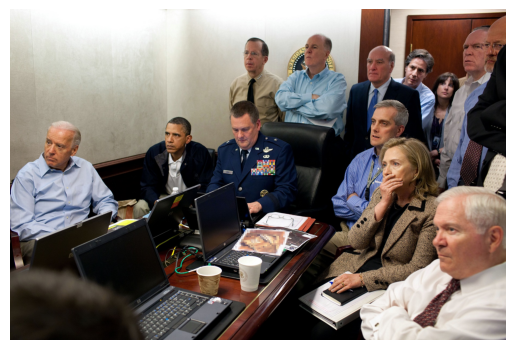

In [104]:
test_image = cv2.imread('/Users/boss/Desktop/Notes/2_Fast_Face_Recognition_System/test_images/test_11.jpg')

# Convert from BGR to RGB color space
test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

# Normalize pixel values to the range [0, 1]
test_image_normalized = test_image_rgb / 255.0

plt.imshow(test_image_normalized)
plt.axis('off')  
plt.show()

In [122]:
test_image_2 = cv2.imread('/Users/boss/Desktop/Notes/2_Fast_Face_Recognition_System/test_images/test_7.jpeg')

In [124]:
test_results = model_l.get(test_image)

for i in range(len(test_results)):
        # bbox = test_results[0]['bbox']
        # score = test_results[0]['det_score']
        test_embedding = test_results[i]['embedding']
        print(identification(df, test_embedding))


/Users/boss/miniconda3/envs/tensorflow/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


('Unknown', 'Unknown')
('Unknown', 'Unknown')
('Unknown', 'Unknown')
('Unknown', 'Unknown')
('Barack Obama', 'Teacher')
('Unknown', 'Unknown')
('Unknown', 'Unknown')
('Unknown', 'Unknown')
('Unknown', 'Unknown')
('Unknown', 'Unknown')
('Unknown', 'Unknown')
('Unknown', 'Unknown')
('Unknown', 'Unknown')
